In [4]:
import pandas as pd
import numpy as np 

In [5]:
# reading data
data_1 = pd.read_csv("../data/raw/WLD_RTFP_country_2023-10-02.csv")

In [6]:
#having a small info about the data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4734 non-null   float64
 1   High       4734 non-null   float64
 2   Low        4734 non-null   float64
 3   Close      4734 non-null   float64
 4   Inflation  4434 non-null   float64
 5   country    4798 non-null   object 
 6   ISO3       4798 non-null   object 
 7   date       4798 non-null   object 
dtypes: float64(5), object(3)
memory usage: 300.0+ KB


In [7]:
# First view of data
data_1.sample(20)

,Open,High,Low,Close,Inflation,country,ISO3,date
1868,0.77,0.78,0.75,0.78,8.13,Haiti,HTI,2015-03-01
2519,0.70,0.71,0.69,0.69,8.48,Liberia,LBR,2012-02-01
1355,1.01,1.04,1.00,1.04,-0.36,"Congo, Rep.",COG,2022-12-01
1694,1.03,1.06,1.00,1.00,-6.06,Guinea-Bissau,GNB,2017-07-01
445,0.74,0.76,0.73,0.75,-3.66,Burkina Faso,BFA,2010-06-01
3059,0.48,0.48,0.47,0.47,NaN,Mozambique,MOZ,2007-08-01
874,0.93,0.93,0.93,0.93,1.28,Cameroon,CMR,2012-07-01
2316,0.79,0.80,0.77,0.79,NaN,Lebanon,LBN,2012-01-01
640,0.67,0.68,0.65,0.68,1.10,Central African Republic,CAF,2009-11-01
3114,0.68,0.69,0.67,0.67,-4.56,Mozambique,MOZ,2012-03-01


In [ ]:
# checking for a specific country
data_1[data_1['country'] == 'Italy']

In [ ]:
# Checking for information on the data 
data_1.isnull().any()

In [9]:
# Counting number of null values, by doing True false then counting the number of True(nulls), and doing the sum of them
data_1.isnull().sum().sum()

620

In [8]:
# counting null inflation values
data_1['Inflation'].isnull().sum().sum()

364

In [10]:
# boolean column null inflation
null_inflation = data_1['Inflation'].isnull()

In [11]:
null_inflation

0        True
1        True
2        True
3        True
4        True
        ...  
4793    False
4794    False
4795    False
4796    False
4797    False
Name: Inflation, Length: 4798, dtype: bool

In [12]:
# showing all the null inflation data
data_1.loc[null_inflation]

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4627,0.51,0.52,0.51,0.51,NaN,"Yemen, Rep.",YEM,2009-08-01
4628,0.51,0.52,0.50,0.51,NaN,"Yemen, Rep.",YEM,2009-09-01
4629,0.52,0.53,0.52,0.53,NaN,"Yemen, Rep.",YEM,2009-10-01
4630,0.53,0.54,0.52,0.53,NaN,"Yemen, Rep.",YEM,2009-11-01


In [13]:
# dropping the data where the inflation is null
data_1 = data_1.dropna(subset=['Inflation'])
data_1

In [16]:
# checking if the data is without null values
data_1.isnull().any()

Open         False
High         False
Low          False
Close        False
Inflation    False
country      False
ISO3         False
date         False
dtype: bool

In [20]:
# showing mean value
data_clean = data_1.groupby('country')['Inflation'].mean().sort_values(ascending=False)
data_clean

country
Sudan                       65.871632
South Sudan                 62.917316
Lebanon                     56.399769
Syrian Arab Republic        41.698803
Haiti                       15.875737
Yemen, Rep.                 13.863735
Myanmar                     11.916404
Nigeria                     11.210526
Burundi                      8.850684
Burkina Faso                 8.713789
Mozambique                   8.557263
Liberia                      7.672053
Afghanistan                  7.585579
Congo, Dem. Rep.             7.071737
Lao PDR                      6.877212
Gambia, The                  6.809053
Somalia                      6.645526
Central African Republic     6.324526
Chad                         4.592000
Mali                         4.578789
Niger                        3.863632
Cameroon                     2.789272
Guinea-Bissau                2.365947
Congo, Rep.                  1.503239
Iraq                         1.497538
Name: Inflation, dtype: float64

<AxesSubplot:title={'center':'Inflation'}, ylabel='country'>

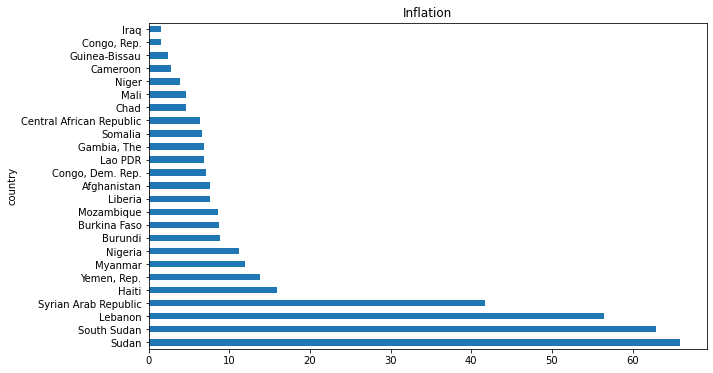

In [24]:
# plot the data
data_clean.plot.barh(title="Inflation",figsize=(10, 6))